In [59]:
import numpy as np
import pandas as pd
from plotnine import *
import urllib, json

# Utils

In [60]:
def growth_rate(ser):
    gr = np.exp(np.diff(np.log(ser))) - 1
    return gr

In [61]:
def get_gr_country(df, country):
    cont = df[df.Country == country]
    ser  = cont[cont.Status == 'confirmed'].Cases
    gr   = growth_rate(ser)
    return gr

# Data

In [62]:
df = pd.read_json('https://api.covid19api.com/all')
df.head()

,Country,Province,Lat,Lon,Date,Cases,Status
0,Thailand,,15.0,101.0,2020-01-22 00:00:00+00:00,2,confirmed
1,Thailand,,15.0,101.0,2020-01-23 00:00:00+00:00,3,confirmed
2,Thailand,,15.0,101.0,2020-01-24 00:00:00+00:00,5,confirmed
3,Thailand,,15.0,101.0,2020-01-25 00:00:00+00:00,7,confirmed
4,Thailand,,15.0,101.0,2020-01-26 00:00:00+00:00,8,confirmed


In [63]:
set(df.Date)

{Timestamp('2020-01-22 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-23 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-24 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-25 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-26 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-27 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-28 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-29 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-30 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-31 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-02 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-03 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-04 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-05 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-06 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-07 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-08 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-09 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-10 00:00:00+0000', tz='UTC'),


In [64]:
countries = df[df.Country.isin(['Australia'])]
#countries = countries[countries.Province.isin(['Ohio','Washington, D.C.','South Carolina'])]
p = ggplot(countries) + geom_line(aes(x = 'Date', y = 'Cases', color='Status'))
p = p + facet_wrap('Province')
p = p +theme(axis_text_x=element_text(rotation=45, hjust=1))
p
ggsave(p, 'plots/australia.jpg', dpi=300, device='jpg')

/home/roi/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/roi/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/australia.jpg
  warn('Filename: {}'.format(filename), PlotnineWarning)


## Growth Rate

In [65]:
sp = get_gr_country(df, 'Spain')
it = get_gr_country(df, 'Italy')

/home/roi/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/roi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


In [66]:
sp

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        inf,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 2.        , 1.16666667,
       0.15384615, 1.13333333, 0.40625   , 0.86666667, 0.42857143,
       0.375     , 0.34545455, 0.16666667, 0.54440154, 0.25      ,
       0.346     , 0.59435364, 0.57968313, 0.34336283, 0.        ,
       1.29776021, 0.22152141])

In [67]:
it

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        inf, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 5.66666667,
       2.1       , 1.5       , 0.47741935, 0.40611354, 0.4068323 ,
       0.44591611, 0.35572519, 0.27027027, 0.50177305, 0.20188902,
       0.22888016, 0.23461231, 0.24894788, 0.20165889, 0.26898188,
       0.2536121 , 0.24366102, 0.10651984, 0.22790423, 0.        ,
       0.41710801, 0.19801812])

In [68]:
names = np.concatenate(
    (np.array(['Italia' for _ in range(len(it))]), np.array(['España' for _ in range(len(it))])
    )
    )

values = np.concatenate( (it, sp) )
dates = df[(df.Country == 'Spain') & (df.Status == 'confirmed')].Date.values[1:]
fechas = np.concatenate( (dates, dates) )
gr_df = pd.DataFrame({'País' : names, 'Fechas':fechas, 'Tasa de Crecimiento':values})

In [69]:
per = gr_df[gr_df.Fechas > '2020-02-15']

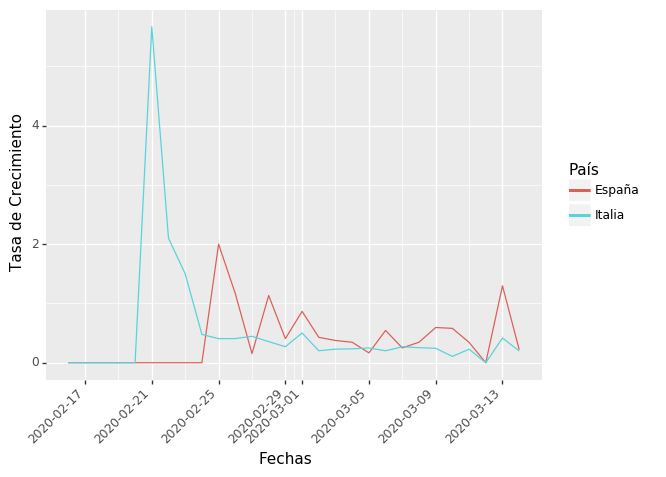

<ggplot: (8788400712775)>

In [70]:
p = ggplot(per) + geom_line(aes(x = 'Fechas', y = 'Tasa de Crecimiento', color='País'))
p = p +theme(axis_text_x=element_text(rotation=45, hjust=1))
p

In [180]:
ggsave(p, 'plots/crecimiento.jpg', dpi=300, device='jpg')

/home/roi/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/roi/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/crecimiento.jpg
  warn('Filename: {}'.format(filename), PlotnineWarning)


# More Data

In [55]:
df = pd.read_csv('data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [15]:
ita_vs_spain = df[df['Country/Region'].isin(['Italy', 'Spain'])]

In [29]:
melted = pd.melt(ita_vs_spain, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
melted.variable = pd.to_datetime(melted.variable)
melted.columns = ['Province', 'Country', 'Lat', 'Long', 'Date', 'Cases']

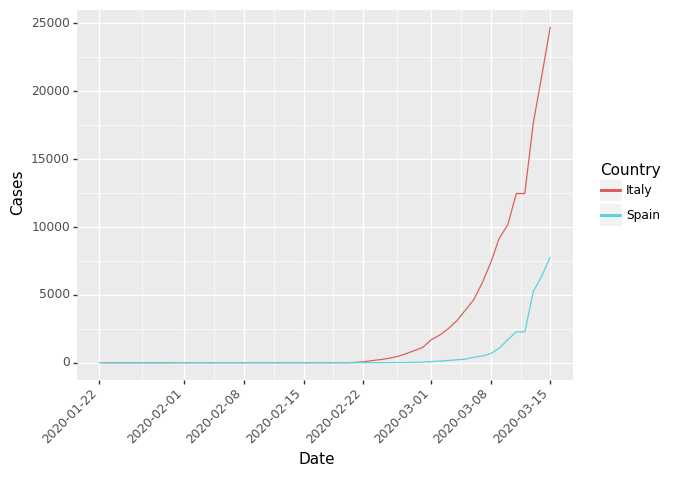

<ggplot: (-9223363248454283488)>

In [30]:
p = ggplot(melted) + geom_line(aes(x = 'Date', y = 'Cases', color='Country'))
p = p + theme(axis_text_x=element_text(rotation=45, hjust=1))
p

In [34]:
ser = melted[melted.Country == 'Italy'].Cases
it   = growth_rate(ser)

ser = melted[melted.Country == 'Spain'].Cases
sp   = growth_rate(ser)

/home/roi/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/roi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


In [50]:
names = np.concatenate(
    (np.array(['Italia' for _ in range(len(it))]), np.array(['España' for _ in range(len(it))])
    )
    )

values = np.concatenate( (it, sp) )
dates1 = melted[melted.Country == 'Italy'].Date.values[1:]
dates2 = melted[melted.Country == 'Spain'].Date.values[1:]
fechas = np.concatenate( (dates1, dates2) )
gr_df = pd.DataFrame({'País' : names, 'Fechas':fechas, 'Tasa de Crecimiento':values})

In [53]:
per = gr_df[gr_df.Fechas > '2020-02-15']
p = ggplot(per) + geom_line(aes(x = 'Fechas', y = 'Tasa de Crecimiento', color='País'))
p = p +theme(axis_text_x=element_text(rotation=45, hjust=1))
p
ggsave(p, 'plots/crecimiento.jpg', dpi=300, device='jpg')

/home/roi/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/roi/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/crecimiento.jpg
  warn('Filename: {}'.format(filename), PlotnineWarning)
